In [1]:
# import necessary packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import pylab
from pylab import rcParams
import scipy
import statsmodels.api as sm
from numpy.random import randn
import statistics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None

In [2]:
# define the function plot_histogram which will be used later
# to create the necessary visualizations

def plot_histogram(c):
    rollover_yes = df[df.ROLLOVERNAME_True==1][c]
    rollover_no = df[df.ROLLOVERNAME_True==0][c]
    yes_mean = rollover_yes.mean()
    no_mean = rollover_no.mean(); 
    fig,ax = plt.subplots(figsize=(6,6))
    ax.hist([rollover_yes,rollover_no], bins=5, stacked=True)
    ax.legend(['ROLLOVERNAME_True','ROLLOVERNAME_False'])
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    ax.axvline(yes_mean, color='blue', lw=2)
    ax.axvline(no_mean, color='orangered', lw=2)
    ax.text((xmax-xmin)/2,
            (ymax-ymin)/2,
            'Delta:\n' + str(round(abs(yes_mean - no_mean),2)),
            bbox={'facecolor':'white'})
    plt.title('Histogram with target overlay by ' + str(c))
    plt.xlabel(c); 
    plt.ylabel('# ROLLOVERNAME')
    plt.show()

# define the function plot_stacked which will be used to create
# necessary visualization

def plot_stacked(c):
    df.groupby([c,target]).size().unstack().plot(kind='bar', stacked=True)

In [3]:
# use pandas to read the vehicle.csv

df = pd.read_csv(r"/Users/mamba/Desktop/WGU/capstone/FARS2020NationalCSV/vehicle.csv", encoding = "ISO-8859-1") 
target = 'ROLLOVERNAME'

In [4]:
# understand information about the dataframe

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54272 entries, 0 to 54271
Columns: 201 entries, STATE to TRLR3GVWRNAME
dtypes: int64(92), object(109)
memory usage: 83.2+ MB


,STATE,ST_CASE,VEH_NO,VE_FORMS,NUMOCCS,DAY,DAYNAME,MONTH,HOUR,MINUTE,HARM_EV,MAN_COLL,UNITTYPE,HIT_RUN,REG_STAT,OWNER,MAKE,MODEL,MAK_MOD,BODY_TYP,MOD_YEAR,TOW_VEH,J_KNIFE,MCARR_I1,V_CONFIG,CARGO_BT,HAZ_INV,HAZ_PLAC,HAZ_ID,HAZ_CNO,HAZ_REL,BUS_USE,SPEC_USE,EMER_USE,TRAV_SP,UNDERIDE,ROLLOVER,ROLINLOC,IMPACT1,DEFORMED,TOWED,M_HARM,FIRE_EXP,DR_PRES,L_STATE,DR_ZIP,L_STATUS,L_TYPE,CDL_STAT,L_ENDORS,L_COMPL,L_RESTRI,DR_HGT,DR_WGT,PREV_ACC,PREV_SUS1,PREV_SUS2,PREV_SUS3,PREV_DWI,PREV_SPD,PREV_OTH,FIRST_MO,FIRST_YR,LAST_MO,LAST_YR,SPEEDREL,VTRAFWAY,VNUM_LAN,VSPD_LIM,VALIGN,VPROFILE,VPAVETYP,VSURCOND,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK,VPICMAKE,VPICMODEL,VPICBODYCLASS,ICFINALBODY,GVWR_FROM,GVWR_TO,TRLR1GVWR,TRLR2GVWR,TRLR3GVWR
count,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000,54272.00000
mean,27.16264,272436.58393,1.44036,1.87518,4.20887,15.72151,15.72151,6.91900,13.85805,29.17036,16.34272,2.68986,1.00000,0.04741,30.06543,1.80625,38.21919,372.43367,38591.62588,28.57437,2265.71037,0.12050,0.07179,8.25934,3.11492,5.07925,1.00219,0.00464,5.91005,0.02716,0.00348,2.89486,1.09513,0.07650,621.60762,0.04382,0.31357,0.62017,17.62561,5.61710,2.86956,14.62649,0.03534,0.99622,29.45403,54538.23703,5.37561,1.45180,6.55972,0.58960,3.04111,1.24674,269.82518,524.88950,17.19789,12.09734,12.12491,12.88246,12.61684,12.83651,12.86553,9.43284,1501.02145,9.45252,1502.88489,1.24724,1.89835,2.76118,51.14619,1.44104,2.17090,3.67646,3.04113,9.06775,1.12765,6.71951,42.23032,66.89332,2.36730,2.15944,45.52148,0.57332,0.17558,3741.31064,7807.02237,57.88593,1.30823,14.10145,14.10510,76.81180,77.02064,77.00116
std,16.35699,163467.09940,0.75122,1.02289,16.23833,8.80302,8.80302,3.32640,9.49644,18.18626,12.42483,6.60413,0.00000,0.21251,21.65123,1.61424,26.63826,309.01870,26784.20550,29.32849,1409.11532,0.72464,0.29461,23.82017,15.97919,21.22035,0.04677,0.10883,172.59762,1.32370,0.09960,16.63155,10.16180,0.79409,466.02295,0.53555,1.24364,1.62587,24.00041,1.59291,1.58547,12.13968,0.18464,0.15808,20.82618,28003.93707,2.05979,1.91817,23.21483,2.12081,1.64851,2.31653,383.03735,402.33765,84.55638,82.58729,82.58300,82.76575,82.79933,82.76735,82.76365,24.61647,2503.47220,24.63158,2504.15476,2.44705,1.35461,1.33308,16.83438,1.15011,2.26707,2.80305,13.23890,25.21861,2.21132,14.77111,29.38605,44.82200,2.84438,1.66312,35.77402,0.58612,0.38046,17213.37690,18576.72029,160.47953,29.24586,14.17073,14.17073,9.57493,1.52007,0.15613
min,1.00000,10001.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,2.00000,1.00000,2001.00000,1.00000,1923.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,36.00000,45.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00

In [5]:
df = df.drop(columns=['STATE', 'STATENAME', 'ST_CASE', 'VEH_NO', 'VE_FORMS', 'NUMOCCS', 'NUMOCCSNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'HOUR', 'MINUTE', 'MINUTENAME', 'MAN_COLL', 'MAN_COLLNAME', 'UNITTYPE', 'UNITTYPENAME', 'HIT_RUN', 'HIT_RUNNAME', 'REG_STAT', 'REG_STATNAME', 'OWNER', 'OWNERNAME', 'MOD_YEARNAME', 'VIN', 'VINNAME', 'VIN_1', 'VIN_2', 'VIN_3', 'VIN_4', 'VIN_5', 'VIN_6', 'VIN_7', 'VIN_8', 'VIN_9', 'VIN_10', 'VIN_11', 'VIN_12', 'J_KNIFE', 'J_KNIFENAME', 'MCARR_I1', 'MCARR_I1NAME', 'MCARR_I2', 'MCARR_I2NAME', 'MCARR_ID', 'MCARR_IDNAME', 'V_CONFIG', 'V_CONFIGNAME', 'CARGO_BT', 'CARGO_BTNAME', 'HAZ_INV', 'HAZ_INVNAME', 'HAZ_PLAC', 'HAZ_PLACNAME', 'HAZ_ID', 'HAZ_IDNAME', 'HAZ_CNO', 'HAZ_CNONAME', 'HAZ_REL', 'HAZ_RELNAME', 'BUS_USE', 'BUS_USENAME', 'SPEC_USE', 'SPEC_USENAME', 'EMER_USE', 'EMER_USENAME', 'UNDERIDE', 'UNDERIDENAME', 'DEFORMED', 'DEFORMEDNAME', 'TOWED', 'TOWEDNAME', 'M_HARM', 'M_HARMNAME', 'FIRE_EXP', 'FIRE_EXPNAME', 'DR_PRES', 'DR_PRESNAME', 'L_STATE', 'L_STATENAME', 'DR_ZIP', 'DR_ZIPNAME', 'L_STATUS', 'L_STATUSNAME', 'L_TYPE', 'L_TYPENAME', 'CDL_STAT', 'CDL_STATNAME', 'L_ENDORS', 'L_ENDORSNAME', 'L_COMPL', 'L_COMPLNAME', 'L_RESTRI', 'L_RESTRINAME','DR_HGT', 'DR_HGTNAME', 'DR_WGT', 'DR_WGTNAME', 'PREV_ACC', 'PREV_ACCNAME', 'PREV_SUS1', 'PREV_SUS1NAME', 'PREV_SUS2', 'PREV_SUS2NAME', 'PREV_SUS3', 'PREV_SUS3NAME', 'PREV_DWI', 'PREV_DWINAME', 'PREV_SPD', 'PREV_SPDNAME', 'PREV_OTH', 'PREV_OTHNAME', 'FIRST_MO', 'FIRST_MONAME', 'FIRST_YR', 'FIRST_YRNAME', 'LAST_MO', 'LAST_MONAME', 'LAST_YR', 'LAST_YRNAME', 'VTCONT_F', 'VTCONT_FNAME', 'PCRASH4', 'PCRASH4NAME', 'PCRASH5', 'PCRASH5NAME', 'ACC_TYPE', 'ACC_TYPENAME', 'DEATHS', 'DR_DRINK', 'DR_DRINKNAME', 'TRLR1VIN', 'TRLR1VINNAME', 'TRLR2VIN', 'TRLR2VINNAME', 'TRLR3VIN', 'TRLR3VINNAME', 'VPICMAKE', 'VPICMAKENAME', 'VPICMODEL', 'VPICMODELNAME', 'ICFINALBODY', 'ICFINALBODYNAME', 'GVWR_FROM', 'GVWR_FROMNAME', 'GVWR_TO', 'GVWR_TONAME', 'TRLR1GVWR', 'TRLR1GVWRNAME', 'TRLR2GVWR', 'TRLR2GVWRNAME', 'TRLR3GVWR', 'TRLR3GVWRNAME', 'BODY_TYP', 'BODY_TYPNAME', 'TRAV_SPNAME', 'TOW_VEH', 'TOW_VEHNAME', 'ROLINLOC', 'ROLINLOCNAME', 'IMPACT1', 'IMPACT1NAME', 'VTRAFWAY', 'VTRAFWAYNAME', 'VSPD_LIM', 'VSPD_LIMNAME', 'VTRAFCON', 'VTRAFCONNAME', 'HARM_EV', 'MODEL', 'MAK_MOD', 'VNUM_LANNAME', 'VALIGN', 'VPROFILE', 'VPAVETYP', 'VSURCOND', 'P_CRASH1', 'P_CRASH2', 'P_CRASH3', 'VPICBODYCLASS', 'ROLLOVER', 'MAKE', 'SPEEDREL', 'MAK_MODNAME', 'HARM_EVNAME', 'P_CRASH2NAME', 'P_CRASH3NAME'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54272 entries, 0 to 54271
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HOURNAME           54272 non-null  object
 1   MAKENAME           54272 non-null  object
 2   MOD_YEAR           54272 non-null  int64 
 3   TRAV_SP            54272 non-null  int64 
 4   ROLLOVERNAME       54272 non-null  object
 5   SPEEDRELNAME       54272 non-null  object
 6   VNUM_LAN           54272 non-null  int64 
 7   VALIGNNAME         54272 non-null  object
 8   VPROFILENAME       54272 non-null  object
 9   VPAVETYPNAME       54272 non-null  object
 10  VSURCONDNAME       54272 non-null  object
 11  P_CRASH1NAME       54272 non-null  object
 12  VPICBODYCLASSNAME  54272 non-null  object
dtypes: int64(3), object(10)
memory usage: 5.4+ MB


In [7]:
# investigate missing data, nulls, and duplicates

null_values = df.isnull().sum()
print(null_values.info())

missing_values = df[df.columns[df.isna().any()]].columns
df_missing_values = df[missing_values]
print(df_missing_values.info())

print(df[df.duplicated()])
print(df.columns.duplicated().any())
print(df.duplicated().any())

<class 'pandas.core.series.Series'>
Index: 13 entries, HOURNAME to VPICBODYCLASSNAME
Series name: None
Non-Null Count  Dtype
--------------  -----
13 non-null     int64
dtypes: int64(1)
memory usage: 208.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54272 entries, 0 to 54271
Empty DataFrameNone
              HOURNAME      MAKENAME  MOD_YEAR  TRAV_SP ROLLOVERNAME  \
129      7:00pm-7:59pm         Honda      2015       65  No Rollover   
1524     Unknown Hours  Unknown Make      9999      999  No Rollover   
1541     Unknown Hours  Unknown Make      9999      999  No Rollover   
1619     Unknown Hours  Unknown Make      9999      999  No Rollover   
1628     Unknown Hours  Unknown Make      9999      999  No Rollover   
...                ...           ...       ...      ...          ...   
53262    2:00pm-2:59pm     Chevrolet      2010      998  No Rollover   
53323    6:00am-6:59am     Chevrolet      2016       55  No Rollover   
53466    0:00am-0:59am     Chevrolet  

In [8]:
# exploring the variable types and their ranges
for a in df.loc[:, df.columns != target]:
    if df.dtypes[a] == "object":
        print('\n{}. is categorical: {}.'.format(a,df[a].unique()))
    else:
        print('\n{}. is numerical:'.format(a ))


HOURNAME. is categorical: ['2:00am-2:59am' '5:00pm-5:59pm' '2:00pm-2:59pm' '3:00pm-3:59pm'
 '0:00am-0:59am' '4:00pm-4:59pm' '7:00pm-7:59pm' '7:00am-7:59am'
 '8:00pm-8:59pm' '10:00am-10:59am' '9:00pm-9:59pm' '10:00pm-10:59pm'
 '12:00pm-12:59pm' '1:00am-1:59am' '6:00am-6:59am' '11:00am-11:59am'
 '3:00am-3:59am' '6:00pm-6:59pm' '8:00am-8:59am' '11:00pm-11:59pm'
 '1:00pm-1:59pm' '9:00am-9:59am' '5:00am-5:59am' '4:00am-4:59am'
 'Unknown Hours'].

MAKENAME. is categorical: ['Lexus' 'Chevrolet' 'Dodge' 'Ford' 'Toyota' 'Peterbilt' 'Hyundai' 'GMC'
 'Infiniti' 'Freightliner' 'Cadillac' 'Nissan/Datsun' 'Honda' 'KIA'
 'International Harvester/Navistar' 'Mack' 'Kenworth' 'Acura' 'BMW'
 'Buick / Opel' 'Isuzu' 'Volvo' 'Scion' 'Mercedes-Benz' 'Volkswagen'
 'Mazda' 'Saturn' 'AM General' 'Other Make' 'Chrysler' 'Harley-Davidson'
 'Mercury' 'Mitsubishi' 'Jeep / Kaiser-Jeep / Willys- Jeep' 'Unknown Make'
 'Land Rover' 'Lincoln' 'Porsche' 'Other Import' 'Yamaha' 'Kawasaki'
 'Pontiac' 'Suzuki' 'Subaru' 'Au

In [9]:
# exploring Rollover

for a in df.loc[:, df.columns == target]:
    if df.dtypes[a] == "object":
        print('\n{} is categorical: {}.'.format(a,df[a].unique()))
    else:
        print('\n{} is numerical:'.format(a ))
print(df.ROLLOVERNAME.value_counts())


ROLLOVERNAME is categorical: ['Rollover, Tripped by Object/Vehicle' 'No Rollover' 'Rollover, Untripped'
 'Rollover, Unknown Type'].
No Rollover                            45998
Rollover, Tripped by Object/Vehicle     6376
Rollover, Unknown Type                   978
Rollover, Untripped                      920
Name: ROLLOVERNAME, dtype: int64


In [10]:
# consolidate the rollovers into 2 categories:
# 0 = no rollover and 1 = rollover

df['ROLLOVERNAME']=np.where(df['ROLLOVERNAME'] == 'No Rollover', False ,df['ROLLOVERNAME'])
df['ROLLOVERNAME']=np.where(df['ROLLOVERNAME'] == 'Rollover, Tripped by Object/Vehicle', True ,df['ROLLOVERNAME'])
df['ROLLOVERNAME']=np.where(df['ROLLOVERNAME'] == 'Rollover, Unknown Type', True ,df['ROLLOVERNAME'])
df['ROLLOVERNAME']=np.where(df['ROLLOVERNAME'] == 'Rollover, Untripped', True ,df['ROLLOVERNAME'])
print(df['ROLLOVERNAME'].unique())
print(df.ROLLOVERNAME.value_counts())
print(df.shape)

[True False]
False    45998
True      8274
Name: ROLLOVERNAME, dtype: int64
(54272, 13)


In [11]:
# exploring hours

print(df.HOURNAME.value_counts())

6:00pm-6:59pm      3403
5:00pm-5:59pm      3193
7:00pm-7:59pm      3190
8:00pm-8:59pm      3148
4:00pm-4:59pm      3122
9:00pm-9:59pm      3112
3:00pm-3:59pm      2997
2:00pm-2:59pm      2705
10:00pm-10:59pm    2674
1:00pm-1:59pm      2539
11:00pm-11:59pm    2347
12:00pm-12:59pm    2261
11:00am-11:59am    2006
6:00am-6:59am      1969
0:00am-0:59am      1918
10:00am-10:59am    1731
7:00am-7:59am      1663
1:00am-1:59am      1636
5:00am-5:59am      1514
2:00am-2:59am      1505
9:00am-9:59am      1488
8:00am-8:59am      1365
4:00am-4:59am      1277
3:00am-3:59am      1166
Unknown Hours       343
Name: HOURNAME, dtype: int64


In [12]:
# consolidate HOURNAME timings to Day and Night


df['HOURNAME']=np.where(df['HOURNAME'] == '7:00am-7:59am', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '8:00am-8:59am', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '9:00am-9:59am', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '10:00am-10:59am', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '11:00am-11:59am', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '12:00pm-12:59pm', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '1:00pm-1:59pm', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '2:00pm-2:59pm', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '3:00pm-3:59pm', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '4:00pm-4:59pm', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '5:00pm-5:59pm', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '6:00pm-6:59pm', 'Day' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '7:00pm-7:59pm', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '8:00pm-8:59pm', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '9:00pm-9:59pm', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '10:00pm-10:59pm', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '11:00pm-11:59pm', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '0:00am-0:59am', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '1:00am-1:59am', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '2:00am-2:59am', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '3:00am-3:59am', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '4:00am-4:59am', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '5:00am-5:59am', 'Night' ,df['HOURNAME'])
df['HOURNAME']=np.where(df['HOURNAME'] == '6:00am-6:59am', 'Night' ,df['HOURNAME'])

df.drop(df[df['HOURNAME'] == 'Unknown Hours'].index, inplace = True)

print(df.HOURNAME.value_counts())
print(df.shape)


Day      28473
Night    25456
Name: HOURNAME, dtype: int64
(53929, 13)


In [13]:
# print(df.MAKENAME.value_counts())

In [14]:
# explore MAKENAME and consolidate where we can

# df['MAKENAME']=np.where(df['MAKENAME'] == 'Peterbilt', 'Semi-Truck Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Freightliner', 'Semi-Truck Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'International Harvester/Navistar', 'Semi-Truck Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Mack', 'Semi-Truck Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Kenworth', 'Semi-Truck Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'AM General', 'Semi-Truck Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Other Make', 'Other' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Jeep / Kaiser-Jeep / Willys- Jeep', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Unknown Make', 'Other' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Other Import', 'Other' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Harley-Davidson', 'Motorcycle Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Yamaha', 'Motorcycle Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Kawasaki', 'Motorcycle Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Triumph', 'English Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Daewoo', 'South Korean Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Victory', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Other Domestic Manufacturers', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'White/Autocar White/GMC', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Not Reported', 'Other' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Bluebird', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Ducati', 'Motorcycle Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'MCI', 'Other' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Gillig', 'Other' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Moto-Guzzi', 'Motorcycle Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Eagle', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Thomas Built', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Saab', 'Swedish Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Fiat', 'Italian Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Plymouth', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Smart', 'German Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Alfa Romeo', 'Italian Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Oldsmobile', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Scion', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Land Rover', 'English Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Jaguar', 'English Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Isuzu', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Porsche', 'German Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Chevrolet', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Ford', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Dodge', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Toyota', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Honda', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Nissan/Datsun', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'GMC', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Hyundai', 'South Korean Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'KIA', 'South Korean Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Suzuki', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Chrysler', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Buick / Opel', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'BMW', 'German Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Mazda', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Subaru', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Volvo', 'Swedish Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Volkswagen', 'German Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Lexus', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Mercedes-Benz', 'German Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Pontiac', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Cadillac', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Infiniti', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Acura', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Mercury', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Lincoln', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Mitsubishi', 'Japanese Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Saturn', 'American Make' ,df['MAKENAME'])
# df['MAKENAME']=np.where(df['MAKENAME'] == 'Audi', 'German Make' ,df['MAKENAME'])


# df.drop(df[df['MAKENAME'] == 'Other'].index, inplace = True)
# print(df.MAKENAME.value_counts())

In [15]:
# explore MAKENAME

print(df.MAKENAME.value_counts())

Chevrolet       7046
Ford            7016
Toyota          4347
Honda           4161
Dodge           3196
                ... 
Moto-Guzzi         5
Alfa Romeo         4
Daewoo             2
Eagle              2
Thomas Built       1
Name: MAKENAME, Length: 65, dtype: int64


In [16]:
# consolidate MAKENAME values to American Make, Japanese Make, and Other

df['MAKENAME']=np.where(df['MAKENAME'] == 'Peterbilt', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Freightliner', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'International Harvester/Navistar', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Mack', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Kenworth', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'AM General', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Other Make', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Jeep / Kaiser-Jeep / Willys- Jeep', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Unknown Make', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Other Import', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Harley-Davidson', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Yamaha', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Kawasaki', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Triumph', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Daewoo', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Victory', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Other Domestic Manufacturers', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'White/Autocar White/GMC', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Not Reported', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Bluebird', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Ducati', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'MCI', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Gillig', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Moto-Guzzi', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Eagle', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Thomas Built', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Saab', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Fiat', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Plymouth', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Smart', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Alfa Romeo', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Oldsmobile', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Scion', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Land Rover', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Jaguar', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Isuzu', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Porsche', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Chevrolet', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Ford', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Dodge', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Toyota', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Honda', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Nissan/Datsun', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'GMC', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Hyundai', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'KIA', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Suzuki', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Chrysler', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Buick / Opel', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'BMW', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Mazda', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Subaru', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Volvo', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Volkswagen', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Lexus', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Mercedes-Benz', 'Other' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Pontiac', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Cadillac', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Infiniti', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Acura', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Mercury', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Lincoln', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Mitsubishi', 'Japanese Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Saturn', 'American Make' ,df['MAKENAME'])
df['MAKENAME']=np.where(df['MAKENAME'] == 'Audi', 'Other' ,df['MAKENAME'])

df.drop(df[df['MAKENAME'] == 'Other'].index, inplace = True)
print(df.MAKENAME.value_counts())
print(df.shape)

American Make    24085
Japanese Make    15177
Name: MAKENAME, dtype: int64
(39262, 13)


In [17]:
print(df.MOD_YEAR.value_counts())
df.drop(df[df['MOD_YEAR'] > 2022].index, inplace = True)
df.drop(df[df['MOD_YEAR'] < 1850].index, inplace = True)
print(df.shape)

2007    2165
2005    2093
2004    1982
2008    1969
2006    1966
        ... 
1927       1
1946       1
1963       1
1936       1
1930       1
Name: MOD_YEAR, Length: 75, dtype: int64
(39166, 13)


In [18]:
# clean data to not include 999 and 998 code to distinguish "Not Reported"

# print(df.TRAV_SP.value_counts())
# print(df.TRAV_SP.mean())
# print(df.TRAV_SP.median())
df['TRAV_SP']=np.where(df['TRAV_SP'] == 997, 152 ,df['TRAV_SP'])
df['TRAV_SP']=np.where(df['TRAV_SP'] == 998, 55 ,df['TRAV_SP'])
df['TRAV_SP']=np.where(df['TRAV_SP'] == 999, 55 ,df['TRAV_SP'])

# print(df.TRAV_SP.value_counts())

# df.drop(df[df['TRAV_SP'] > 997].index, inplace = True)

# print(df.TRAV_SP.value_counts())
print(df.shape)

(39166, 13)


In [19]:
# explore SPEEDRELNAME

print(df.SPEEDRELNAME.value_counts())

No                                             29625
Yes, Exceeded Speed Limit                       3143
Yes, Too Fast for Conditions                    2912
Reported as Unknown                             1811
Yes, Specifics Unknown                          1311
No Driver Present/Unknown if Driver Present      256
Yes, Racing                                      108
Name: SPEEDRELNAME, dtype: int64


In [20]:
# adjust SPEEDRELNAME and consolidate into yes and no

df['SPEEDRELNAME']=np.where(df['SPEEDRELNAME'] == 'Yes, Exceeded Speed Limit', True ,df['SPEEDRELNAME'])
df['SPEEDRELNAME']=np.where(df['SPEEDRELNAME'] == 'Yes, Too Fast for Conditions', True ,df['SPEEDRELNAME'])
df['SPEEDRELNAME']=np.where(df['SPEEDRELNAME'] == 'Yes, Specifics Unknown', True ,df['SPEEDRELNAME'])
df['SPEEDRELNAME']=np.where(df['SPEEDRELNAME'] == 'Yes, Racing', True ,df['SPEEDRELNAME'])
df['SPEEDRELNAME']=np.where(df['SPEEDRELNAME'] == 'No', False ,df['SPEEDRELNAME'])
df['SPEEDRELNAME']=np.where(df['SPEEDRELNAME'] == 'Reported as Unknown', False ,df['SPEEDRELNAME'])
df['SPEEDRELNAME']=np.where(df['SPEEDRELNAME'] == 'No Driver Present/Unknown if Driver Present', False ,df['SPEEDRELNAME'])
print(df.SPEEDRELNAME.value_counts())
print(df.shape)

False    31692
True      7474
Name: SPEEDRELNAME, dtype: int64
(39166, 13)


In [21]:
# explore VALIGNNAME

print(df.VALIGNNAME.value_counts())

Straight                             30819
Curve - Left                          3690
Curve - Right                         3149
Curve - Unknown Direction              610
Not Reported                           553
Non-Trafficway or Driveway Access      331
Reported as Unknown                     14
Name: VALIGNNAME, dtype: int64


In [22]:
# adjust VALIGNNAME and consolidate into appropriate titles

df['VALIGNNAME']=np.where(df['VALIGNNAME'] == 'Curve - Left', 'Curve' ,df['VALIGNNAME'])
df['VALIGNNAME']=np.where(df['VALIGNNAME'] == 'Curve - Right', 'Curve' ,df['VALIGNNAME'])
df['VALIGNNAME']=np.where(df['VALIGNNAME'] == 'Curve - Unknown Direction', 'Curve' ,df['VALIGNNAME'])
df['VALIGNNAME']=np.where(df['VALIGNNAME'] == 'Not Reported', 'Other' ,df['VALIGNNAME'])
df['VALIGNNAME']=np.where(df['VALIGNNAME'] == 'Non-Trafficway or Driveway Access', 'Other' ,df['VALIGNNAME'])
df['VALIGNNAME']=np.where(df['VALIGNNAME'] == 'Reported as Unknown', 'Other' ,df['VALIGNNAME'])

df.drop(df[df['VALIGNNAME'] == 'Other'].index, inplace = True)
print(df.VALIGNNAME.value_counts())
print(df.shape)

Straight    30819
Curve        7449
Name: VALIGNNAME, dtype: int64
(38268, 13)


In [23]:
# explore VPROFILENAME

print(df.VPROFILENAME.value_counts())

Level                   27290
Grade, Unknown Slope     3694
Not Reported             2886
Downhill                 1903
Uphill                   1475
Hillcrest                 901
Sag (Bottom)              105
Reported as Unknown        14
Name: VPROFILENAME, dtype: int64


In [24]:
# adjust VPROFILENAME and consolidate into appropriate titles

df['VPROFILENAME']=np.where(df['VPROFILENAME'] == 'Grade, Unknown Slope', 'Hill' ,df['VPROFILENAME'])
df['VPROFILENAME']=np.where(df['VPROFILENAME'] == 'Not Reported', 'Other' ,df['VPROFILENAME'])
df['VPROFILENAME']=np.where(df['VPROFILENAME'] == 'Hillcrest', 'Hill' ,df['VPROFILENAME'])
df['VPROFILENAME']=np.where(df['VPROFILENAME'] == 'Non-Trafficway or Driveway Access', 'Other' ,df['VPROFILENAME'])
df['VPROFILENAME']=np.where(df['VPROFILENAME'] == 'Sag (Bottom)', 'Other' ,df['VPROFILENAME'])
df['VPROFILENAME']=np.where(df['VPROFILENAME'] == 'Reported as Unknown', 'Other' ,df['VPROFILENAME'])
df['VPROFILENAME']=np.where(df['VPROFILENAME'] == 'Downhill', 'Hill' ,df['VPROFILENAME'])
df['VPROFILENAME']=np.where(df['VPROFILENAME'] == 'Uphill', 'Hill' ,df['VPROFILENAME'])


df.drop(df[df['VPROFILENAME'] == 'Other'].index, inplace = True)


print(df.VPROFILENAME.value_counts())
print(df.shape)

Level    27290
Hill      7973
Name: VPROFILENAME, dtype: int64
(35263, 13)


In [25]:
# explore VPAVETYPNAME

print(df.VPAVETYPNAME.value_counts())

Blacktop, Bituminous, or Asphalt    22871
Not Reported                         9060
Concrete                             2618
Reported as Unknown                   314
Slag, Gravel or Stone                 254
Dirt                                  122
Other                                  19
Brick or Block                          5
Name: VPAVETYPNAME, dtype: int64


In [26]:
# adjust VPAVETYPNAME and consolidate into appropriate titles

df['VPAVETYPNAME']=np.where(df['VPAVETYPNAME'] == 'Non-Trafficway or Driveway Access', 'Other' 
,df['VPAVETYPNAME'])
df['VPAVETYPNAME']=np.where(df['VPAVETYPNAME'] == 'Not Reported', 'Blacktop' 
,df['VPAVETYPNAME'])
df['VPAVETYPNAME']=np.where(df['VPAVETYPNAME'] == 'Reported as Unknown', 'Other' ,df['VPAVETYPNAME'])
df['VPAVETYPNAME']=np.where(df['VPAVETYPNAME'] == 'Blacktop, Bituminous, or Asphalt', 
'Blacktop' ,df['VPAVETYPNAME'])
df['VPAVETYPNAME']=np.where(df['VPAVETYPNAME'] == 'Concrete', 'Blacktop' 
,df['VPAVETYPNAME'])
df['VPAVETYPNAME']=np.where(df['VPAVETYPNAME'] == 'Slag, Gravel or Stone', 'Dirt' ,df['VPAVETYPNAME'])
df['VPAVETYPNAME']=np.where(df['VPAVETYPNAME'] == 'Brick or Block', 'Dirt' ,df['VPAVETYPNAME'])

df.drop(df[df['VPAVETYPNAME'] == 'Other'].index, inplace = True)
print(df.VPAVETYPNAME.value_counts())
print(df.shape)

Blacktop    34549
Dirt          381
Name: VPAVETYPNAME, dtype: int64
(34930, 13)


In [27]:
# explore VSURCONDNAME

print(df.VSURCONDNAME.value_counts())

Dry                           29458
Wet                            4497
Ice/Frost                       260
Snow                            188
Not Reported                    180
Mud, Dirt or Gravel              91
Water (Standing or Moving)       84
Slush                            76
Reported as Unknown              60
Other                            26
Sand                              6
Oil                               4
Name: VSURCONDNAME, dtype: int64


In [28]:
# adjust VSURCONDNAME and consolidate into appropriate titles

df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Not Reported', 'Other' ,df['VSURCONDNAME'])
df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Non-Trafficway or Driveway Access', 'Other' ,df['VSURCONDNAME'])
df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Water (Standing or Moving)', 'Wet/Ice/Frost/Snow' ,df['VSURCONDNAME'])
df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Ice/Frost', 'Wet/Ice/Frost/Snow' ,df['VSURCONDNAME'])
df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Snow', 'Wet/Ice/Frost/Snow' ,df['VSURCONDNAME'])
df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Slush', 'Wet/Ice/Frost/Snow' ,df['VSURCONDNAME'])
df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Reported as Unknown', 'Other' ,df['VSURCONDNAME'])
df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Sand', 'Mud, Dirt or Gravel' ,df['VSURCONDNAME'])
df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Oil', 'Wet/Ice/Frost/Snow' ,df['VSURCONDNAME'])
df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Wet', 'Wet/Ice/Frost/Snow' ,df['VSURCONDNAME'])
df['VSURCONDNAME']=np.where(df['VSURCONDNAME'] == 'Mud, Dirt or Gravel', 'Wet/Ice/Frost/Snow' ,df['VSURCONDNAME'])

df.drop(df[df['VSURCONDNAME'] == 'Other'].index, inplace = True)
print(df.VSURCONDNAME.value_counts())
print(df.shape)

Dry                   29458
Wet/Ice/Frost/Snow     5206
Name: VSURCONDNAME, dtype: int64
(34664, 13)


In [29]:
# explore P_CRASH1NAME

print(df.P_CRASH1NAME.value_counts())

Going Straight                                                21913
Negotiating a Curve                                            6086
Turning Left                                                   2329
Stopped in Roadway                                             1170
Passing or Overtaking Another Vehicle                           682
Changing Lanes                                                  588
Decelerating in Road                                            413
Unknown                                                         289
No Driver Present / Unknown if Driver Present                   219
Turning Right                                                   206
Other(specify:)                                                 156
Making a U-turn                                                 142
Starting in Road                                                131
Accelerating in Road                                            119
Backing Up (other than for Parking Position)    

In [30]:
# adjust P_CRASH1NAME and consolidate into appropriate titles

df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Unknown', 'Other' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Disabled or "Parked" in Travel lane', 'Other' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Passing or Overtaking Another Vehicle', 'Merging' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Changing Lanes', 'Merging' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Accelerating in Road', 'Accelerating/Decelerating' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Decelerating in Road', 'Accelerating/Decelerating' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'No Driver Present / Unknown if Driver Present', 'Other' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Other(specify:)', 'Other' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Starting in Road', 'Accelerating/Decelerating' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Backing Up (other than for Parking Position)', 'Other' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Leaving a Parking Position', 'Accelerating/Decelerating' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Entering a Parking Position', 'Accelerating/Decelerating' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Stopped in Roadway', 'Other' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Turning Left', 'Turning' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Turning Right', 'Turning' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Making a U-turn', 'Turning' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Successful Avoidance Maneuver to a Previous Critical Event', 'Turning' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Accelerating/Decelerating', 'Going Straight' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Negotiating a Curve', 'Turning' ,df['P_CRASH1NAME'])
df['P_CRASH1NAME']=np.where(df['P_CRASH1NAME'] == 'Merging', 'Turning' ,df['P_CRASH1NAME'])

df.drop(df[df['P_CRASH1NAME'] == 'Other'].index, inplace = True)

print(df.P_CRASH1NAME.value_counts())
print(df.shape)

Going Straight    22594
Turning           10133
Name: P_CRASH1NAME, dtype: int64
(32727, 13)


In [31]:
# explore VPICBODYCLASSNAME

print(df.VPICBODYCLASSNAME.value_counts())

Sedan/Saloon                                                                   10221
Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)                         8168
Pickup                                                                          7739
Coupe                                                                           1361
Hatchback/Liftback/Notchback                                                     935
Minivan                                                                          802
Motorcycle - Sport                                                               669
Crossover Utility Vehicle (CUV)                                                  322
Cargo Van                                                                        309
Van                                                                              271
Convertible/Cabriolet                                                            237
Motorcycle - Street                                              

In [32]:
# adjust VPICBODYCLASSNAME and consolidate into appropriate titles

df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Sedan/Saloon', 'Sedan' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Pickup', 'SUV/MPV/CUV' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)', 'SUV/MPV/CUV' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Cargo Van', 'Van/Bus' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Convertible/Cabriolet', 'Convertible' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Hatchback/Liftback/Notchback', 'Hatchback' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Bus - School Bus', 'Van/Bus' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - School Bus Chassis', 'Van/Bus' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Minivan', 'Van/Bus' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Custom', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Crossover Utility Vehicle (CUV)', 'SUV/MPV/CUV' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Unknown', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Sport Utility Truck (SUT)', 'SUV/MPV/CUV' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Dual Sport / Adventure / Supermoto / On/Off-road', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Off-road Vehicle - Farm Equipment', 'Truck' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Cruiser', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Touring / Sport Touring', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Off-road Vehicle - Recreational Off-Road Vehicle (ROV)', 'Truck' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Street', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Standard', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - Motor Home Chassis', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - Glider', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Off-road Vehicle - All Terrain Vehicle (ATV) (Motorcycle-style)', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - Chassis Cab (Single Cab)', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Sport', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - Cutaway', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - Commercial Chassis', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Scooter', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Wagon', 'Hatchback' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Unknown Body Class', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Trike', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Off-road Vehicle - Motocross (Off-road short distance, closed track racing)', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - Stripped Chassis', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Step Van / Walk-in Van', 'Van/Bus' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorized Bicycle', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Off-road Vehicle - Golf Cart', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Off-road Vehicle - Enduro (Off-road long distance racing)', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Unenclosed Three Wheeled / Open Autocycle', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Side Car', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Not Reported', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Off-road Vehicle - Dirt Bike / Off-Road', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Small / Minibike', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Off-road Vehicle - Construction Equipment', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Competition', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - Bus Chassis', 'Van/Bus' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Off-road Vehicle - Go Kart', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Low Speed Vehicle (LSV) / Neighborhood Electric Vehicle (NEV)', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorcycle - Moped', 'Motorcycle' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - Commercial Bus Chassis', 'Van/Bus' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Limousine', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Off-road Vehicle - Snowmobile', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Motorhome', 'Van/Bus' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - Chassis Cab (Double Cab)', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Incomplete - Chassis Cab (Number of Cab Unknown)', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Roadster', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Convertible', 'Coupe' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Bus', 'Van/Bus' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Van', 'Van/Bus' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Hatchback', 'Sedan' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Coupe', 'Sedan' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Truck-Tractor', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Van/Bus', 'Other' ,df['VPICBODYCLASSNAME'])
df['VPICBODYCLASSNAME']=np.where(df['VPICBODYCLASSNAME'] == 'Truck', 'SUV/MPV/CUV' ,df['VPICBODYCLASSNAME'])

df.drop(df[df['VPICBODYCLASSNAME'] == 'Other'].index, inplace = True)
print(df.VPICBODYCLASSNAME.value_counts())
print(df.shape)

SUV/MPV/CUV    16414
Sedan          12911
Motorcycle      1454
Name: VPICBODYCLASSNAME, dtype: int64
(30779, 13)


In [33]:
# exploring the variable types and their ranges
for a in df.loc[:, df.columns != target]:
    if df.dtypes[a] == "object":
        print('\n{}. is categorical: {}.'.format(a,df[a].unique()))
    else:
        print('\n{}. is numerical:'.format(a ))


HOURNAME. is categorical: ['Night' 'Day'].

MAKENAME. is categorical: ['Japanese Make' 'American Make'].

MOD_YEAR. is numerical:

TRAV_SP. is numerical:

SPEEDRELNAME. is categorical: [True False].

VNUM_LAN. is numerical:

VALIGNNAME. is categorical: ['Curve' 'Straight'].

VPROFILENAME. is categorical: ['Level' 'Hill'].

VPAVETYPNAME. is categorical: ['Blacktop' 'Dirt'].

VSURCONDNAME. is categorical: ['Dry' 'Wet/Ice/Frost/Snow'].

P_CRASH1NAME. is categorical: ['Turning' 'Going Straight'].

VPICBODYCLASSNAME. is categorical: ['Sedan' 'SUV/MPV/CUV' 'Motorcycle'].


In [34]:
df.info()
df.describe()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30779 entries, 0 to 54271
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HOURNAME           30779 non-null  object
 1   MAKENAME           30779 non-null  object
 2   MOD_YEAR           30779 non-null  int64 
 3   TRAV_SP            30779 non-null  int64 
 4   ROLLOVERNAME       30779 non-null  object
 5   SPEEDRELNAME       30779 non-null  object
 6   VNUM_LAN           30779 non-null  int64 
 7   VALIGNNAME         30779 non-null  object
 8   VPROFILENAME       30779 non-null  object
 9   VPAVETYPNAME       30779 non-null  object
 10  VSURCONDNAME       30779 non-null  object
 11  P_CRASH1NAME       30779 non-null  object
 12  VPICBODYCLASSNAME  30779 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.3+ MB
(30779, 13)


In [35]:
# create a dataframe for numerical variables and categorical variables

num_vars = df.select_dtypes(include="number").columns
print(num_vars)
print(num_vars.shape)

cat_vars = df.select_dtypes(include="object").columns
print(cat_vars)
print(cat_vars.shape)

Index(['MOD_YEAR', 'TRAV_SP', 'VNUM_LAN'], dtype='object')
(3,)
Index(['HOURNAME', 'MAKENAME', 'ROLLOVERNAME', 'SPEEDRELNAME', 'VALIGNNAME',
       'VPROFILENAME', 'VPAVETYPNAME', 'VSURCONDNAME', 'P_CRASH1NAME',
       'VPICBODYCLASSNAME'],
      dtype='object')
(10,)


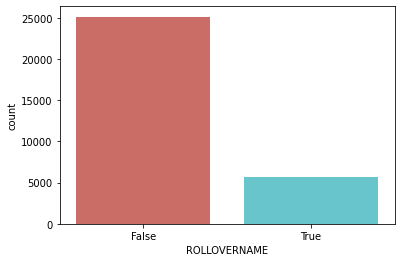

In [36]:
# we use sns countplot to display the distribution
# of the target variable.

sns.countplot(x=target, data=df, palette='hls')
plt.savefig('countplot_logreg.jpg')
plt.show()

In [37]:
# we can also groupby the numerical 
# predictor variables in a mean analysis 
# against the target variable, ROLLOVERNAME.

df.groupby(target).mean().round(2).T

ROLLOVERNAME,False,True
MOD_YEAR,2008.79000,2006.03000
TRAV_SP,52.73000,58.77000
VNUM_LAN,2.79000,2.34000


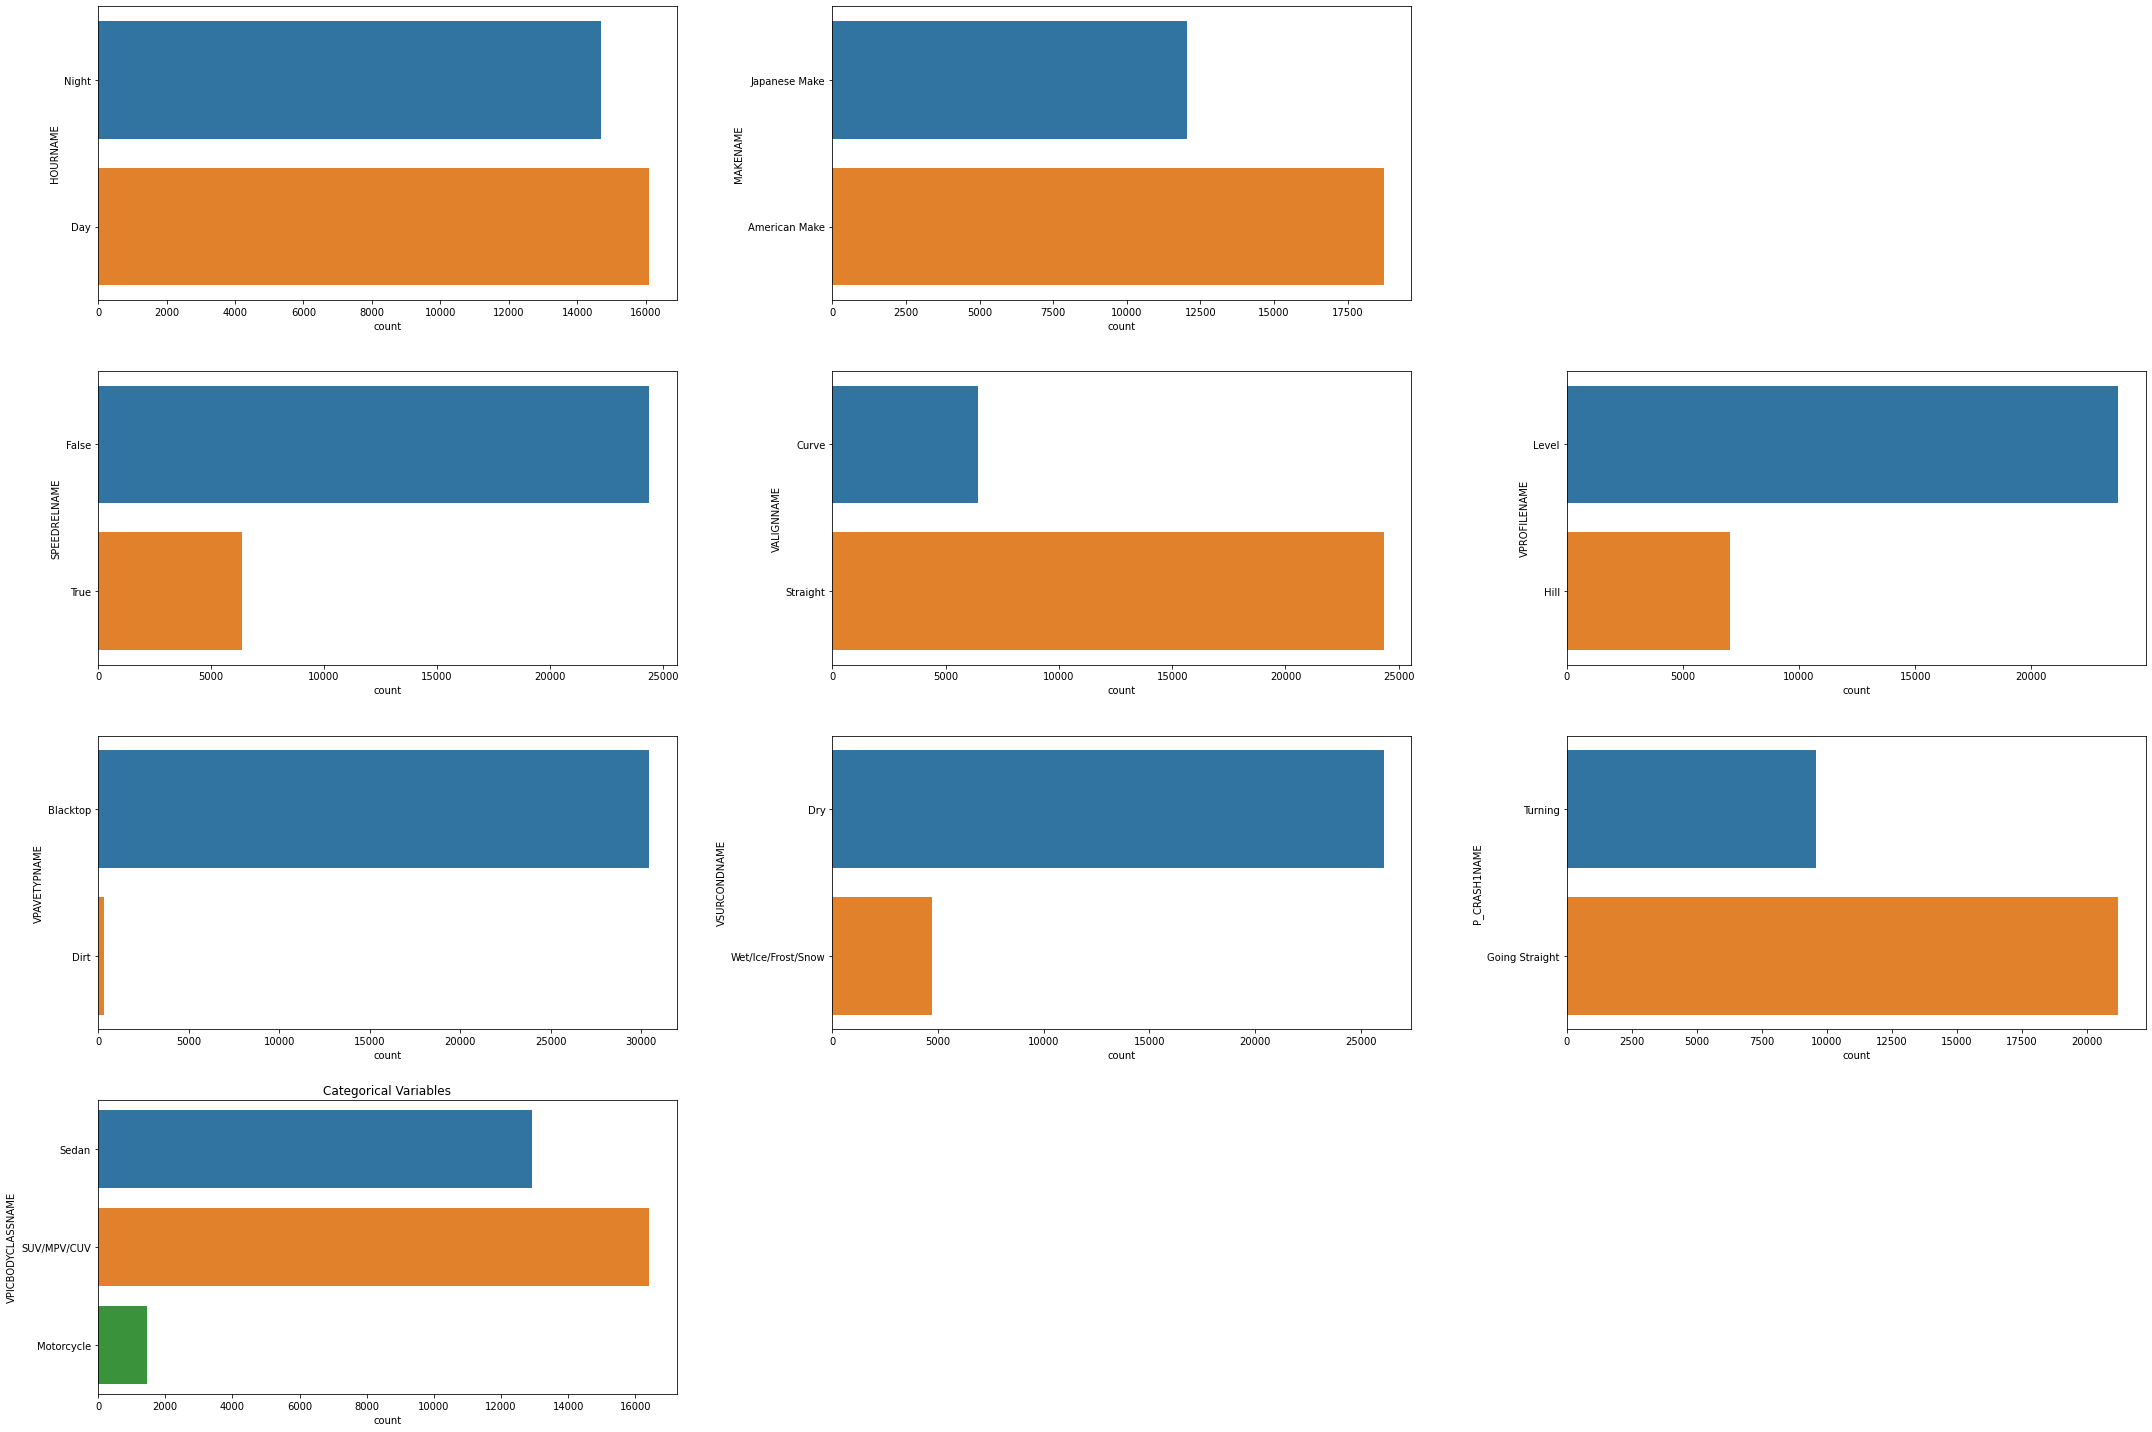

In [38]:
# to analyze the categorical data, we can plot a countplot 
# of each the variables.

fig = plt.figure(figsize=(30,20))
for d, col in enumerate(cat_vars):
    if col != target:
        plt.subplot(4, 3, d+1)
        ax = sns.countplot(y=col, data=df)
        fig.tight_layout(h_pad=4, w_pad=4)
plt.title('Categorical Variables')
plt.savefig('cat_vars_logreg.jpg')
plt.show()

In [39]:
for k in cat_vars:
    if k != target:
        print('\n\n=====================')
        print('\t{}'.format(k.upper()))
        print('============================')
        print(df.groupby(k).mean().round(2).T)



	HOURNAME
HOURNAME        Day      Night
MOD_YEAR 2008.19000 2008.39000
TRAV_SP    52.66000   55.13000
VNUM_LAN    2.63000    2.79000


	MAKENAME
MAKENAME  American Make  Japanese Make
MOD_YEAR     2007.90000     2008.88000
TRAV_SP        54.00000       53.59000
VNUM_LAN        2.65000        2.80000


	SPEEDRELNAME
SPEEDRELNAME      False       True
MOD_YEAR     2008.51000 2007.44000
TRAV_SP        51.73000   61.91000
VNUM_LAN        2.73000    2.61000


	VALIGNNAME
VALIGNNAME      Curve   Straight
MOD_YEAR   2007.47000 2008.50000
TRAV_SP      56.72000   53.07000
VNUM_LAN      2.31000    2.81000


	VPROFILENAME
VPROFILENAME       Hill      Level
MOD_YEAR     2007.79000 2008.43000
TRAV_SP        55.44000   53.36000
VNUM_LAN        2.53000    2.76000


	VPAVETYPNAME
VPAVETYPNAME   Blacktop       Dirt
MOD_YEAR     2008.33000 2004.35000
TRAV_SP        53.84000   53.81000
VNUM_LAN        2.71000    2.36000


	VSURCONDNAME
VSURCONDNAME        Dry  Wet/Ice/Frost/Snow
MOD_YEAR     2008.3000

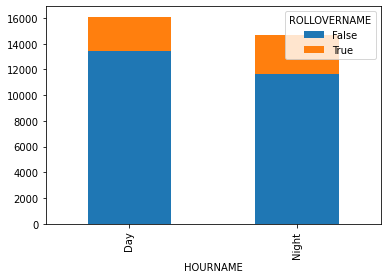

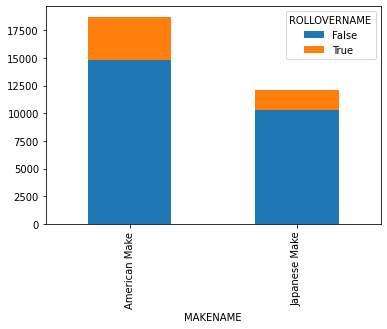

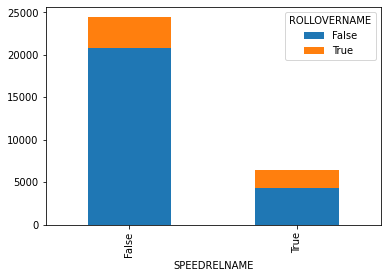

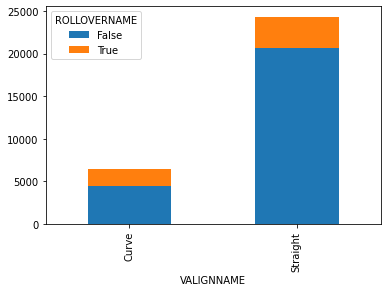

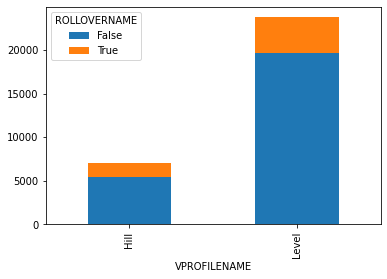

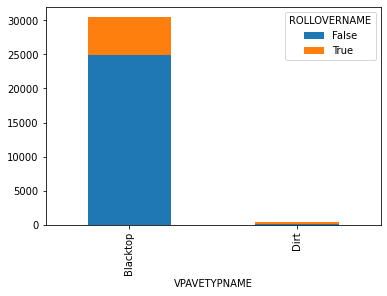

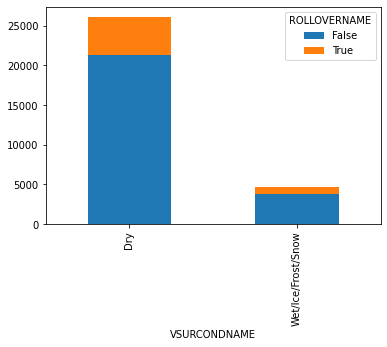

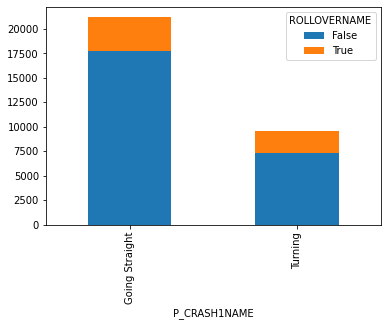

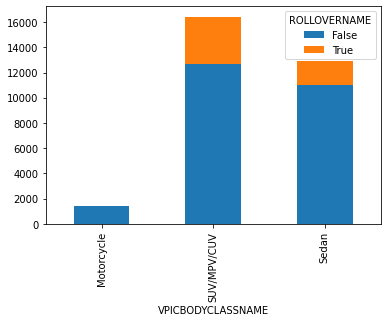

In [40]:
# variable vs target overlay
for k in cat_vars:
    if k != target:
        plot_stacked(k)

In [41]:
# converting categorical variables to numerical
for k in cat_vars:
    if k in df.columns:
        df = pd.get_dummies(df, columns=[k], drop_first=True)
        predictor_variables = (df.select_dtypes(include="uint8").columns.tolist())

In [42]:
df.describe()

,MOD_YEAR,TRAV_SP,VNUM_LAN,HOURNAME_Night,MAKENAME_Japanese Make,ROLLOVERNAME_True,SPEEDRELNAME_True,VALIGNNAME_Straight,VPROFILENAME_Level,VPAVETYPNAME_Dirt,VSURCONDNAME_Wet/Ice/Frost/Snow,P_CRASH1NAME_Turning,VPICBODYCLASSNAME_SUV/MPV/CUV,VPICBODYCLASSNAME_Sedan
count,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000
mean,2008.28552,53.83892,2.70951,0.47692,0.39163,0.18386,0.20706,0.79060,0.77121,0.01101,0.15238,0.31154,0.53329,0.41947
std,7.54046,13.74805,1.21214,0.49947,0.48812,0.38738,0.40520,0.40688,0.42006,0.10437,0.35939,0.46313,0.49890,0.49348
min,1923.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2003.00000,55.00000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,2008.00000,55.00000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,2015.00000,55.00000,3.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000
max,2021.00000,152.00000,9.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [43]:
print(predictor_variables)

['HOURNAME_Night', 'MAKENAME_Japanese Make', 'ROLLOVERNAME_True', 'SPEEDRELNAME_True', 'VALIGNNAME_Straight', 'VPROFILENAME_Level', 'VPAVETYPNAME_Dirt', 'VSURCONDNAME_Wet/Ice/Frost/Snow', 'P_CRASH1NAME_Turning', 'VPICBODYCLASSNAME_SUV/MPV/CUV', 'VPICBODYCLASSNAME_Sedan']


In [44]:
target = 'ROLLOVERNAME_True'

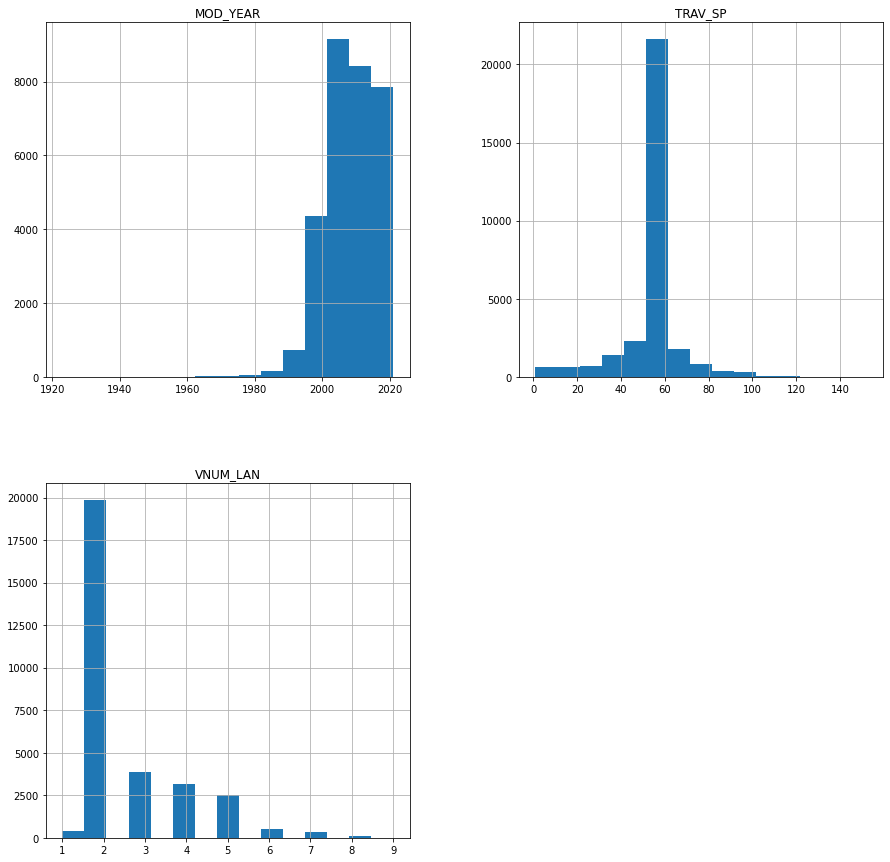

In [45]:
df[['MOD_YEAR', 'TRAV_SP', 'VNUM_LAN']].hist(bins=15, figsize=(15,15))
fig.tight_layout(h_pad=5,w_pad=5)
plt.show()

In [46]:
print(df.columns)
df.shape
df.info(show_counts=True)
df.describe()

Index(['MOD_YEAR', 'TRAV_SP', 'VNUM_LAN', 'HOURNAME_Night',
       'MAKENAME_Japanese Make', 'ROLLOVERNAME_True', 'SPEEDRELNAME_True',
       'VALIGNNAME_Straight', 'VPROFILENAME_Level', 'VPAVETYPNAME_Dirt',
       'VSURCONDNAME_Wet/Ice/Frost/Snow', 'P_CRASH1NAME_Turning',
       'VPICBODYCLASSNAME_SUV/MPV/CUV', 'VPICBODYCLASSNAME_Sedan'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30779 entries, 0 to 54271
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   MOD_YEAR                         30779 non-null  int64
 1   TRAV_SP                          30779 non-null  int64
 2   VNUM_LAN                         30779 non-null  int64
 3   HOURNAME_Night                   30779 non-null  uint8
 4   MAKENAME_Japanese Make           30779 non-null  uint8
 5   ROLLOVERNAME_True                30779 non-null  uint8
 6   SPEEDRELNAME_True                30779 non

,MOD_YEAR,TRAV_SP,VNUM_LAN,HOURNAME_Night,MAKENAME_Japanese Make,ROLLOVERNAME_True,SPEEDRELNAME_True,VALIGNNAME_Straight,VPROFILENAME_Level,VPAVETYPNAME_Dirt,VSURCONDNAME_Wet/Ice/Frost/Snow,P_CRASH1NAME_Turning,VPICBODYCLASSNAME_SUV/MPV/CUV,VPICBODYCLASSNAME_Sedan
count,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000,30779.00000
mean,2008.28552,53.83892,2.70951,0.47692,0.39163,0.18386,0.20706,0.79060,0.77121,0.01101,0.15238,0.31154,0.53329,0.41947
std,7.54046,13.74805,1.21214,0.49947,0.48812,0.38738,0.40520,0.40688,0.42006,0.10437,0.35939,0.46313,0.49890,0.49348
min,1923.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2003.00000,55.00000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,2008.00000,55.00000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,2015.00000,55.00000,3.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000
max,2021.00000,152.00000,9.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


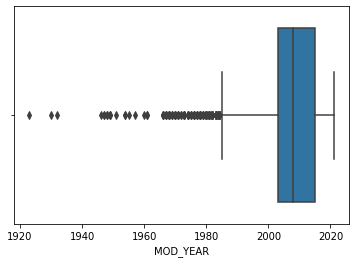

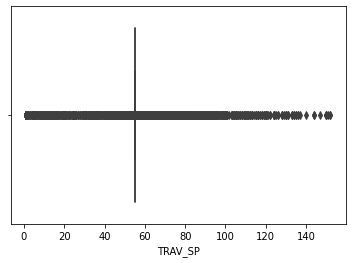

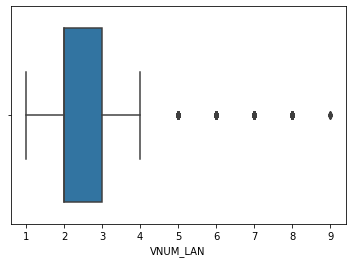

In [47]:
# seaborn boxplots are another tool for continuous variables
sns.boxplot('MOD_YEAR', data = df)
plt.show()
sns.boxplot('TRAV_SP', data = df)
plt.show()
sns.boxplot('VNUM_LAN', data = df)
plt.show()

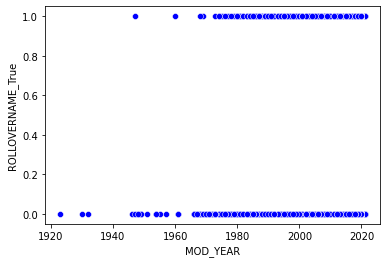

In [48]:
sns.scatterplot(x=df['MOD_YEAR'], y=df['ROLLOVERNAME_True'], color='blue')
plt.show()

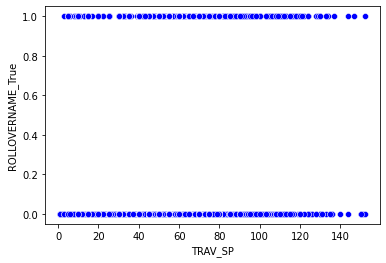

In [49]:
sns.scatterplot(x=df['TRAV_SP'], y=df['ROLLOVERNAME_True'], color='blue')
plt.show()

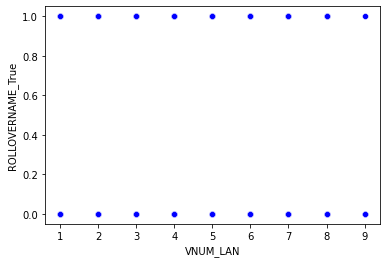

In [50]:
sns.scatterplot(x=df['VNUM_LAN'], y=df['ROLLOVERNAME_True'], color='blue')
plt.show()

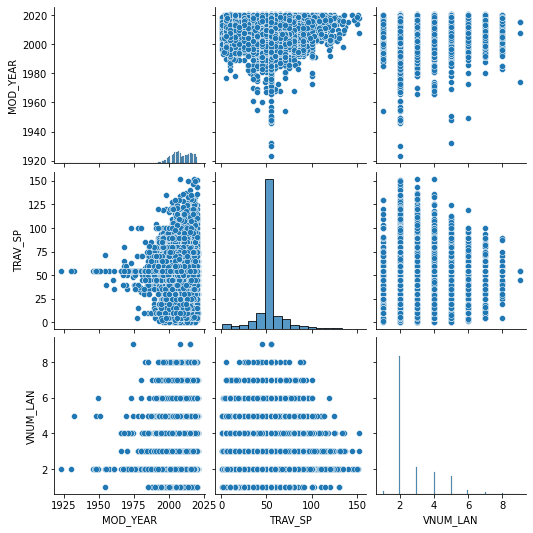

In [51]:
# pairplot to show a holistic view of the correlations
ax = sns.pairplot(df[num_vars])
plt.show()

In [52]:
print(df.head())
print(df.columns)

   MOD_YEAR  TRAV_SP  VNUM_LAN  HOURNAME_Night  MAKENAME_Japanese Make  \
0      1997       80         2               1                       1   
1      1993       55         4               0                       0   
2      2007       55         4               0                       0   
3      2004       55         4               0                       0   
4      2006       55         4               0                       0   

   ROLLOVERNAME_True  SPEEDRELNAME_True  VALIGNNAME_Straight  \
0                  1                  1                    0   
1                  0                  0                    1   
2                  0                  0                    1   
3                  0                  0                    1   
4                  0                  0                    1   

   VPROFILENAME_Level  VPAVETYPNAME_Dirt  VSURCONDNAME_Wet/Ice/Frost/Snow  \
0                   1                  0                                0   
1               

<AxesSubplot:>

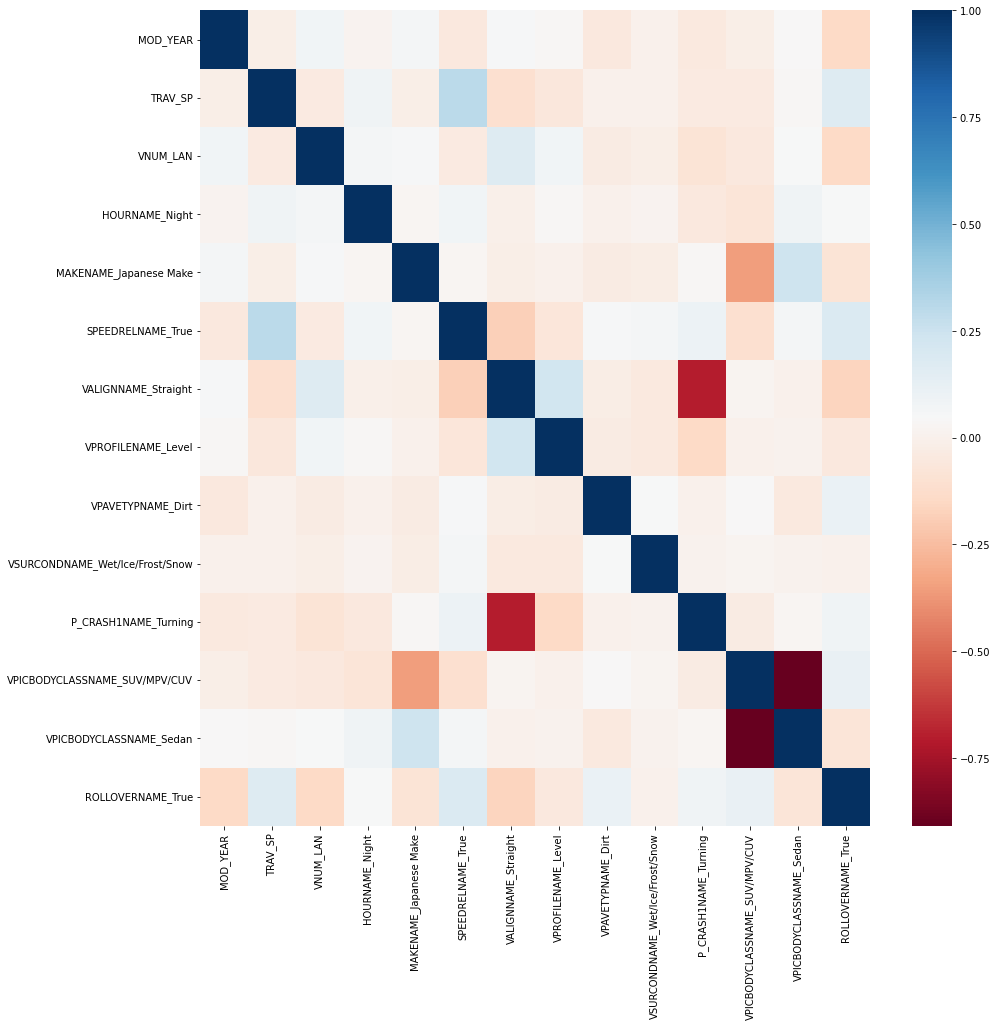

In [53]:
df = df[['MOD_YEAR', 'TRAV_SP', 'VNUM_LAN', 'HOURNAME_Night', 'MAKENAME_Japanese Make',
       'SPEEDRELNAME_True', 'VALIGNNAME_Straight',
       'VPROFILENAME_Level', 'VPAVETYPNAME_Dirt',
       'VSURCONDNAME_Wet/Ice/Frost/Snow', 'P_CRASH1NAME_Turning',
       'VPICBODYCLASSNAME_SUV/MPV/CUV', 'VPICBODYCLASSNAME_Sedan','ROLLOVERNAME_True']]


correlation = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, xticklabels=correlation.columns, 
yticklabels = correlation.columns, cmap='RdBu')

In [54]:
# providing a copy of the prepared data set
df.to_csv('cleaned_rolloverdata.csv')
prep_df = pd.read_csv('cleaned_rolloverdata.csv')
prep_df['intercept']=1
prep_df = pd.get_dummies(prep_df, drop_first=False)
prep_df_col = prep_df.columns
print(prep_df_col)

Index(['Unnamed: 0', 'MOD_YEAR', 'TRAV_SP', 'VNUM_LAN', 'HOURNAME_Night',
       'MAKENAME_Japanese Make', 'SPEEDRELNAME_True', 'VALIGNNAME_Straight',
       'VPROFILENAME_Level', 'VPAVETYPNAME_Dirt',
       'VSURCONDNAME_Wet/Ice/Frost/Snow', 'P_CRASH1NAME_Turning',
       'VPICBODYCLASSNAME_SUV/MPV/CUV', 'VPICBODYCLASSNAME_Sedan',
       'ROLLOVERNAME_True', 'intercept'],
      dtype='object')


In [55]:
prep_df = prep_df[['MOD_YEAR', 'TRAV_SP', 'VNUM_LAN', 'HOURNAME_Night', 'MAKENAME_Japanese Make',
       'SPEEDRELNAME_True', 'VALIGNNAME_Straight',
       'VPROFILENAME_Level', 'VPAVETYPNAME_Dirt',
       'VSURCONDNAME_Wet/Ice/Frost/Snow', 'P_CRASH1NAME_Turning',
       'VPICBODYCLASSNAME_SUV/MPV/CUV', 'VPICBODYCLASSNAME_Sedan','ROLLOVERNAME_True', 'intercept']]
       

In [56]:
# initial logit model with only the numerical predictor variables

logit_model_num = sm.Logit(prep_df['ROLLOVERNAME_True'], 
prep_df[['MOD_YEAR', 'TRAV_SP', 'VNUM_LAN', 'intercept']]).fit()
print(logit_model_num.summary())

Optimization terminated successfully.
         Current function value: 0.441938
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      ROLLOVERNAME_True   No. Observations:                30779
Model:                          Logit   Df Residuals:                    30775
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 May 2022   Pseudo R-squ.:                 0.07388
Time:                        22:07:08   Log-Likelihood:                -13602.
converged:                       True   LL-Null:                       -14688.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MOD_YEAR      -0.0449      0.002    -22.706      0.000      -0.049      -0.041
TRAV_SP        0.0349      0.

In [57]:
# initial logit model with only the categorical predictor variables

logit_model_cat = sm.Logit(prep_df['ROLLOVERNAME_True'], 
prep_df[['HOURNAME_Night', 'MAKENAME_Japanese Make',
       'SPEEDRELNAME_True', 'VALIGNNAME_Straight',
       'VPROFILENAME_Level', 'VPAVETYPNAME_Dirt',
       'VSURCONDNAME_Wet/Ice/Frost/Snow', 'P_CRASH1NAME_Turning',
       'VPICBODYCLASSNAME_SUV/MPV/CUV', 'VPICBODYCLASSNAME_Sedan',
        'intercept']]).fit()
print(logit_model_cat.summary())

Optimization terminated successfully.
         Current function value: 0.434138
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      ROLLOVERNAME_True   No. Observations:                30779
Model:                          Logit   Df Residuals:                    30768
Method:                           MLE   Df Model:                           10
Date:                Sat, 14 May 2022   Pseudo R-squ.:                 0.09023
Time:                        22:07:08   Log-Likelihood:                -13362.
converged:                       True   LL-Null:                       -14688.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
HOURNAME_Night                      0.2153      0.031      6.880  

In [58]:
# initial logit model with all predictor variables

logit_model_cat = sm.Logit(prep_df['ROLLOVERNAME_True'], 
prep_df[['MOD_YEAR', 'TRAV_SP', 'VNUM_LAN', 'HOURNAME_Night', 'MAKENAME_Japanese Make',
       'SPEEDRELNAME_True', 'VALIGNNAME_Straight',
       'VPROFILENAME_Level', 'VPAVETYPNAME_Dirt',
       'VSURCONDNAME_Wet/Ice/Frost/Snow', 'P_CRASH1NAME_Turning',
       'VPICBODYCLASSNAME_SUV/MPV/CUV', 'VPICBODYCLASSNAME_Sedan',
       'intercept']]).fit()
print(logit_model_cat.summary())

Optimization terminated successfully.
         Current function value: 0.412338
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      ROLLOVERNAME_True   No. Observations:                30779
Model:                          Logit   Df Residuals:                    30765
Method:                           MLE   Df Model:                           13
Date:                Sat, 14 May 2022   Pseudo R-squ.:                  0.1359
Time:                        22:07:08   Log-Likelihood:                -12691.
converged:                       True   LL-Null:                       -14688.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
MOD_YEAR                           -0.0431      0.002    -20.932  

In [59]:
# define the correlation between variables to see which ones have the most
# multicollinearity

def get_redundant_pairs(prep_df):
    pairs_drop = set()
    cols = prep_df.columns
    for i in range(0, prep_df.shape[1]):
        for j in range(0, i+1):
            pairs_drop.add((cols[i], cols[j]))
    return pairs_drop

def get_top_abs_correlations(prep_df, n=5):
    au_corr = prep_df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(prep_df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(prep_df, 10))

Top Absolute Correlations
VPICBODYCLASSNAME_SUV/MPV/CUV  VPICBODYCLASSNAME_Sedan         0.90865
VALIGNNAME_Straight            P_CRASH1NAME_Turning            0.70280
MAKENAME_Japanese Make         VPICBODYCLASSNAME_SUV/MPV/CUV   0.35186
TRAV_SP                        SPEEDRELNAME_True               0.30012
MAKENAME_Japanese Make         VPICBODYCLASSNAME_Sedan         0.24153
VALIGNNAME_Straight            VPROFILENAME_Level              0.22668
SPEEDRELNAME_True              ROLLOVERNAME_True               0.18159
                               VALIGNNAME_Straight             0.18062
TRAV_SP                        ROLLOVERNAME_True               0.17031
VNUM_LAN                       VALIGNNAME_Straight             0.16850
dtype: float64


In [90]:
# reduced logit model

logit_model2= sm.Logit(prep_df['ROLLOVERNAME_True'],
prep_df[['MOD_YEAR',
         'TRAV_SP',
         'VNUM_LAN',
         'HOURNAME_Night',
         'SPEEDRELNAME_True',
         'VALIGNNAME_Straight',
         'VPAVETYPNAME_Dirt',
         'VSURCONDNAME_Wet/Ice/Frost/Snow',
         'VPICBODYCLASSNAME_SUV/MPV/CUV',
         'VPICBODYCLASSNAME_Sedan',
         'intercept']]).fit()
print(logit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.412575
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      ROLLOVERNAME_True   No. Observations:                30779
Model:                          Logit   Df Residuals:                    30768
Method:                           MLE   Df Model:                           10
Date:                Sat, 14 May 2022   Pseudo R-squ.:                  0.1354
Time:                        23:17:26   Log-Likelihood:                -12699.
converged:                       True   LL-Null:                       -14688.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
MOD_YEAR                           -0.0433      0.002    -21.121  

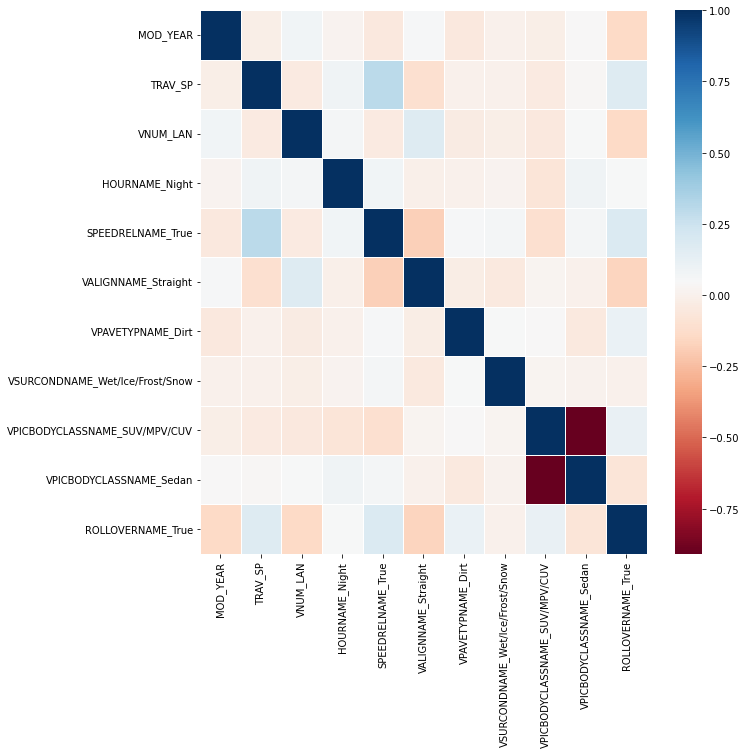

In [84]:
# seaborn heatmap can help explain the correlation
heatmap_churn = df[['MOD_YEAR',
         'TRAV_SP',
         'VNUM_LAN',
         'HOURNAME_Night',
         'SPEEDRELNAME_True',
         'VALIGNNAME_Straight',
         'VPAVETYPNAME_Dirt',
         'VSURCONDNAME_Wet/Ice/Frost/Snow',
         'VPICBODYCLASSNAME_SUV/MPV/CUV',
         'VPICBODYCLASSNAME_Sedan',
         'ROLLOVERNAME_True']]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(heatmap_churn.corr().iloc[:], annot=False, linewidths=.5, ax=ax, cmap='RdBu')
plt.show()

In [62]:
# preparing for the confusion matrix, importing the data
# from the prepared dataset
conf_df = pd.read_csv('cleaned_rolloverdata.csv')
X = conf_df.iloc[:, 1:-1].values
y = conf_df.iloc[:, -1].values

In [63]:
# for the confusion matrix, need to create a Training and Test
# data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size = 0.2, random_state = 0)

In [64]:
# now we train the logistic regression on the training set
from sklearn.linear_model import  LogisticRegression
log_classify = LogisticRegression(random_state= 0)
log_classify.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [65]:
# since we have trained the regression, we can try
# to predict the Test results
y_pred = log_classify.predict(X_test)

In [66]:
# we can now make the confusion matrix using sklearn's
# confusion matrix protocol
from sklearn.metrics import confusion_matrix
confusion_visualization = confusion_matrix(y_test, y_pred)
print(confusion_visualization)

[[4984   64]
 [1012   96]]


In [67]:
# check the accuracy using sklearn's cross val score
# which is a k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=log_classify, X = X_train, 
y = y_train, cv= 10)
print('Accuracy: {:.2f}%'.format(accuracy.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracy.std()*100))

Accuracy: 81.85%
Standard Deviation: 0.33%


<AxesSubplot:>

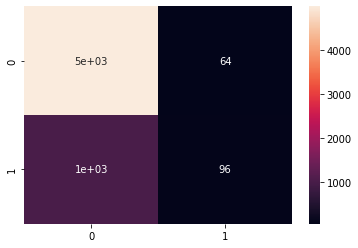

In [68]:
y_pred_test = log_classify.predict(X_test)
confusion_visualization2 = confusion_matrix(y_test, y_pred_test)
sns.heatmap(confusion_visualization2, annot=True)

In [69]:
# this is a classification report from sklearn
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5048
           1       0.60      0.09      0.15      1108

    accuracy                           0.83      6156
   macro avg       0.72      0.54      0.53      6156
weighted avg       0.79      0.83      0.77      6156



In [70]:
# there are still variables with high p-values and high correlations
# we can run another correlation test to see which variables are 
# multicollinear

def get_redundant_pairs(heatmap_churn):
    pairs_drop = set()
    cols = heatmap_churn.columns
    for i in range(0, heatmap_churn.shape[1]):
        for j in range(0, i+1):
            pairs_drop.add((cols[i], cols[j]))
    return pairs_drop

def get_top_abs_correlations(heatmap_churn, n=5):
    au_corr = heatmap_churn.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(heatmap_churn)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(heatmap_churn, 10))


Top Absolute Correlations
VPICBODYCLASSNAME_SUV/MPV/CUV  VPICBODYCLASSNAME_Sedan   0.90865
TRAV_SP                        SPEEDRELNAME_True         0.30012
SPEEDRELNAME_True              ROLLOVERNAME_True         0.18159
                               VALIGNNAME_Straight       0.18062
TRAV_SP                        ROLLOVERNAME_True         0.17031
VNUM_LAN                       VALIGNNAME_Straight       0.16850
VALIGNNAME_Straight            ROLLOVERNAME_True         0.16368
VNUM_LAN                       ROLLOVERNAME_True         0.14386
MOD_YEAR                       ROLLOVERNAME_True         0.14168
VPICBODYCLASSNAME_SUV/MPV/CUV  ROLLOVERNAME_True         0.11518
dtype: float64


In [71]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/usr/local/bin/python3
3.10.4 (v3.10.4:9d38120e33, Mar 23 2022, 17:29:05) [Clang 13.0.0 (clang-1300.0.29.30)]
sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)
